In [12]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [13]:
locations = {
    'Jaipur': (26.9124, 75.7873),
    'Udaipur': (24.5854, 73.7125),
    'Jodhpur': (26.2389, 73.0243),
    'Jaisalmer': (26.9157, 70.9083),
    'Ajmer': (26.4499, 74.6399),
    'Pushkar': (26.4870, 74.5511),
    'Bikaner': (28.0229, 73.3119),
    'Mount Abu': (24.5937, 72.7156),
    'Chittorgarh': (24.8880, 74.6269),
    'Alwar': (27.5625, 76.6250),
    'Ranthambore': (26.0173, 76.5026),
    'Bharatpur': (27.2160, 77.4895),
    'Kota': (25.2138, 75.8648),
    'Bundi': (25.4305, 75.6499),
    'Shekhawati': (27.4630, 74.0183),
    'Kumbhalgarh': (25.1495, 73.5801),
    'Neemrana': (27.9873, 76.3844),
    'Barmer': (25.7520, 71.3927),
    'Pali': (25.7725, 73.3233),
    'Sikar': (27.6094, 75.1399)
}

In [14]:
def distance(city1, city2):
    x1, y1 = locations[city1]
    x2, y2 = locations[city2]
    return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)

def total_distance(tour):
    dist = 0
    for i in range(len(tour)):
        dist += distance(tour[i], tour[(i+1) % len(tour)])  # Circular tour
    return dist

def simulated_annealing(locations, initial_temp, cooling_rate, stopping_temp):
    # Initialize with a random tour
    current_tour = list(locations.keys())
    random.shuffle(current_tour)
    current_cost = total_distance(current_tour)

    best_tour = list(current_tour)
    best_cost = current_cost

    temp = initial_temp

    while temp > stopping_temp:
        new_tour = list(current_tour)
        i, j = random.sample(range(len(locations)), 2)
        new_tour[i], new_tour[j] = new_tour[j], new_tour[i]
        new_cost = total_distance(new_tour)
        if new_cost < current_cost or random.random() < math.exp((current_cost - new_cost) / temp):
            current_tour = new_tour
            current_cost = new_cost
            if current_cost < best_cost:
                best_tour = list(current_tour)
                best_cost = current_cost
        temp *= cooling_rate

    return best_tour, best_cost

Best tour found: ['Pushkar', 'Chittorgarh', 'Bundi', 'Kota', 'Ranthambore', 'Bharatpur', 'Alwar', 'Pali', 'Kumbhalgarh', 'Udaipur', 'Mount Abu', 'Barmer', 'Jaisalmer', 'Jodhpur', 'Bikaner', 'Shekhawati', 'Sikar', 'Neemrana', 'Jaipur', 'Ajmer']
Cost of the best tour: 25.523282313990983


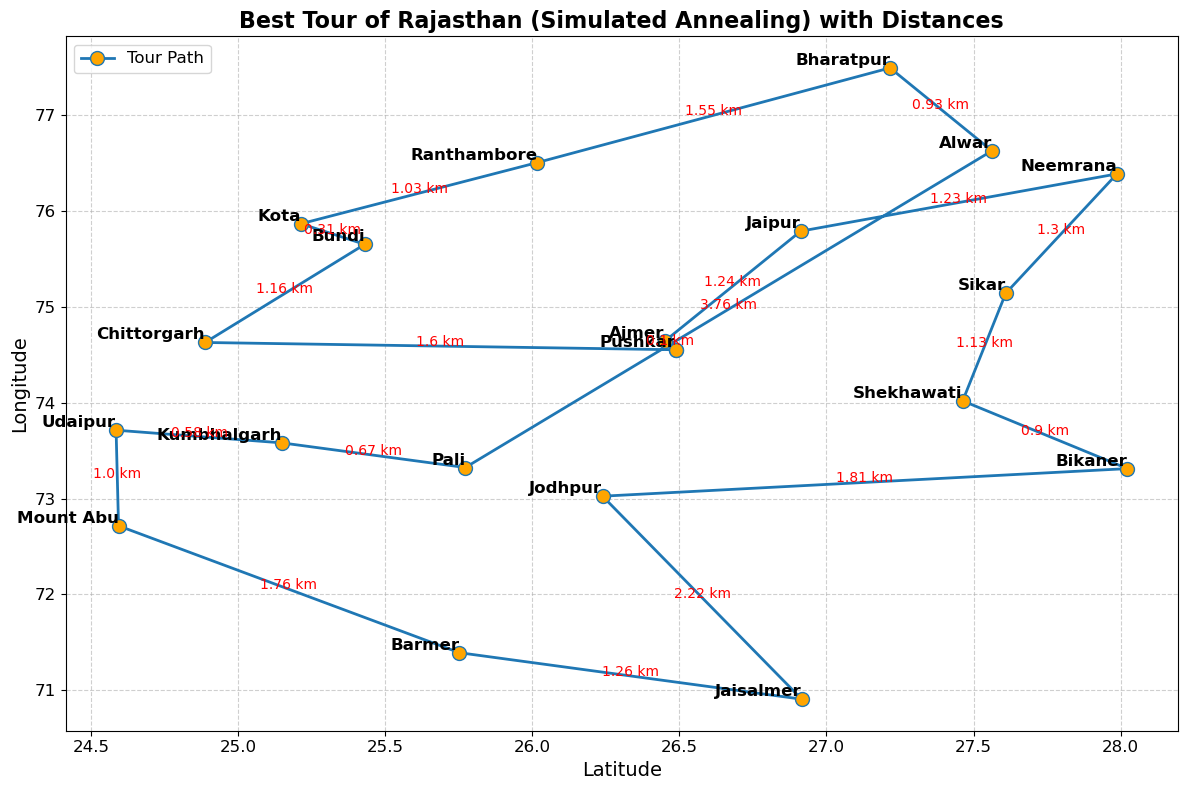

In [15]:
def plot_tour(tour):
    x = [locations[city][0] for city in tour] + [locations[tour[0]][0]]  # Circular tour
    y = [locations[city][1] for city in tour] + [locations[tour[0]][1]]  # Circular tour

    plt.figure(figsize=(12, 8))
    plt.plot(x, y, marker='o', color='#1f77b4', linestyle='-', markersize=10, markerfacecolor='orange', lw=2)
    for i in range(len(tour)):
        city1 = tour[i]
        city2 = tour[(i + 1) % len(tour)]  
        plt.text(locations[city1][0], locations[city1][1], city1, fontsize=12, ha='right', va='bottom', fontweight='bold')
        mid_x = (locations[city1][0] + locations[city2][0]) / 2
        mid_y = (locations[city1][1] + locations[city2][1]) / 2
        dist = round(distance(city1, city2), 2)
        plt.text(mid_x, mid_y, f'{dist} km', color='red', fontsize=10, ha='center')
    plt.title("Best Tour of Rajasthan (Simulated Annealing) with Distances", fontsize=16, fontweight='bold')
    plt.xlabel("Latitude", fontsize=14)
    plt.ylabel("Longitude", fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(["Tour Path"], loc='upper left', fontsize=12)
    plt.tight_layout()
    plt.show()
initial_temp = 10000
cooling_rate = 0.995
stopping_temp = 1e-3
best_tour, best_cost = simulated_annealing(locations, initial_temp, cooling_rate, stopping_temp)
print("Best tour found:", best_tour)
print("Cost of the best tour:", best_cost)
plot_tour(best_tour)